In [64]:
# https://towardsdatascience.com/smote-fdce2f605729
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/JoosKorstanje/datasets/main/sales_data.csv')
data.head()

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1


<AxesSubplot:xlabel='buy'>

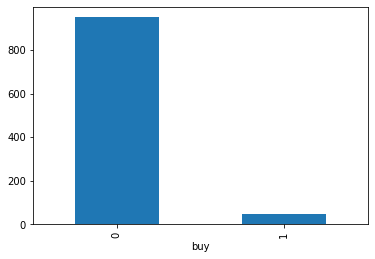

In [65]:
# show class imbalance
data.pivot_table(index='buy', aggfunc='size').plot(kind='bar')

In [66]:
# create stratified train/test split

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, stratify=data.buy)

<AxesSubplot:title={'center':'Verify that train resembles original data'}, xlabel='buy'>

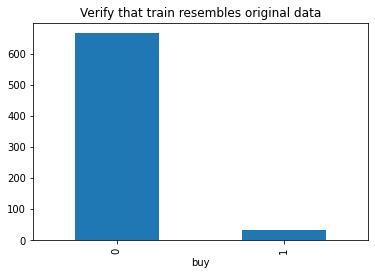

In [67]:
train.pivot_table(index='buy', aggfunc='size').plot(kind='bar', title='Verify that train resembles original data')

<AxesSubplot:title={'center':'Verify that test resembles orig. data'}, xlabel='buy'>

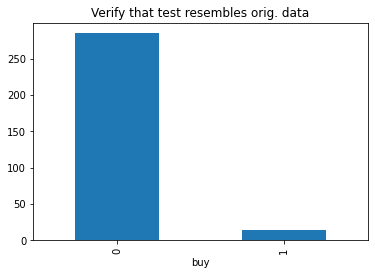

In [68]:
test.pivot_table(index='buy', aggfunc='size').plot(kind='bar', title='Verify that test resembles orig. data')

In [69]:
from sklearn.linear_model import LogisticRegression

my_log_reg = LogisticRegression()

my_log_reg.fit(train[['time_on_page', 'pages_viewed', 'interest_ski', 'interest_climb']], train['buy'])

preds = my_log_reg.predict(test[['time_on_page', 'pages_viewed', 'interest_ski', 'interest_climb']])

True negatives:  284 
False positives:  1 
False negatives:  8 
True positives:  7


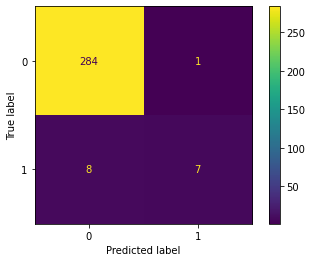

In [70]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tn, fp, fn, tp = confusion_matrix(test['buy'], preds).ravel()

print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

ConfusionMatrixDisplay.from_predictions(test['buy'], preds)
plt.show()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(test['buy'], preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       0.88      0.47      0.61        15

    accuracy                           0.97       300
   macro avg       0.92      0.73      0.80       300
weighted avg       0.97      0.97      0.97       300



In [72]:
# pip install imblearn
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train[['time_on_page', 'pages_viewed', 'interest_ski',	'interest_climb']], train['buy'])

<AxesSubplot:title={'center':'Class distribution with SMOTE'}, xlabel='buy'>

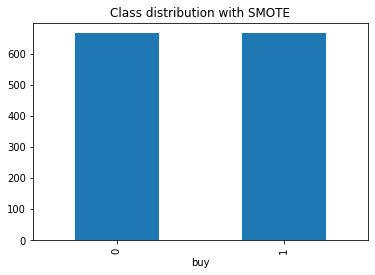

In [73]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution with SMOTE', xlabel='buy')

In [74]:
log_reg_2 = LogisticRegression()

log_reg_2.fit(X_resampled, y_resampled)

preds2 = log_reg_2.predict(test[['time_on_page', 'pages_viewed', 'interest_ski',	'interest_climb']])

In [75]:
tn, fp, fn, tp = confusion_matrix(test['buy'], preds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  256 
False positives:  29 
False negatives:  2 
True positives:  13


In [76]:
print(classification_report(test['buy'], preds2))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       285
           1       0.31      0.87      0.46        15

    accuracy                           0.90       300
   macro avg       0.65      0.88      0.70       300
weighted avg       0.96      0.90      0.92       300

